In [9]:
#coding:utf-8
'''
陷波滤波器
https://blog.csdn.net/firemicrocosm/article/details/48622961
'''
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
from scipy import signal

In [4]:
src = cv2.cvtColor(cv2.imread('datas/f2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

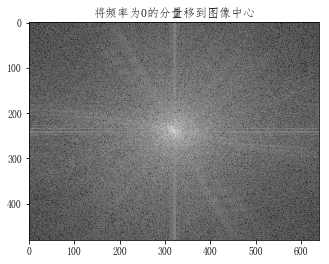

In [10]:
h,w = gray.shape

# 傅里叶变换
srcf = np.fft.fft2(gray)
# 将频率为0的分量转移到图像中心
srcf = np.fft.fftshift(srcf)
s1 = s1 = np.log(np.abs(srcf))
plt.title('将频率为0的分量移到图像中心')
plt.imshow(cv2.convertScaleAbs(s1),cmap='gray')


In [11]:
# 设计理想低通滤波器
# 定义低通滤波器
flt = np.zeros(gray.shape,dtype=np.uint8)
# 滤波器圆心
rx1 = w // 2
ry1 = h // 2

# 半径
r = min(w,h) // 3

for i in range(w):
    for j in range(h):
        if (i - rx1) ** 2 + (j - ry1) ** 2 <= r * r:
            flt[j,i] = 1

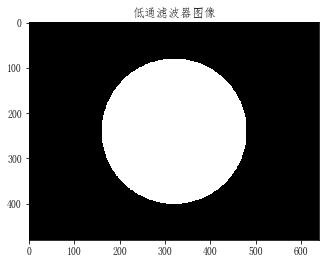

In [13]:
# 滤波并显示结果
plt.title('低通滤波器图像')
plt.imshow(flt,cmap='gray')

In [19]:
flt = np.float64(flt)
dFImg = srcf * flt
dFImg = np.fft.ifftshift(dFImg)
DLImg = np.fft.ifft2(dFImg)
DLImg = np.abs(DLImg)
DLImg = (DLImg - np.amin(DLImg)) / (np.amax(DLImg) - np.amin(DLImg))


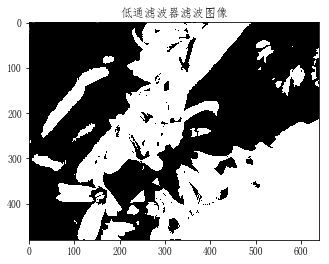

In [21]:
plt.title('低通滤波器滤波图像')
plt.imshow(cv2.convertScaleAbs(DLImg),cmap='gray')

In [22]:
# 设计理想陷波滤波器
# 定义陷波滤波器
flt = np.zeros_like(gray)
rx1 = w // 4
ry1 = h // 4
rx2 = w * 3 // 4
ry2 = h // 2
r = min(w,h) // 7

for i in range(w):
    for j in range(h):
        if ((i - rx1) ** 2 + (j - ry1) ** 2) >= ((i - rx2)**2 + (j - ry2)**2):
            flt[j,i] = 1

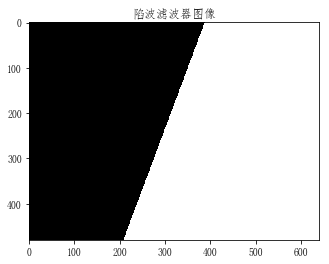

In [25]:
plt.title('陷波滤波器图像')
plt.imshow(flt,cmap='gray')

In [26]:
flt = np.float64(flt)
dFImg = srcf * flt
dFImg = np.fft.ifftshift(dFImg)
DLImg = np.fft.ifft2(dFImg)
DLImg = np.abs(DLImg)
DLImg = (DLImg - np.amin(DLImg)) / (np.amax(DLImg) - np.amin(DLImg))

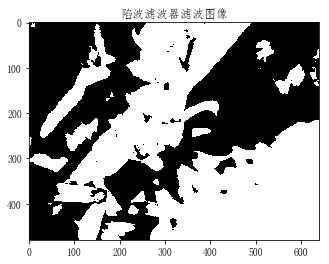

In [27]:
plt.title('陷波滤波器滤波图像')
plt.imshow(cv2.convertScaleAbs(DLImg),cmap='gray')